# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [20]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,717,96,46,74,202,74,5,163,39,20,149,185,408,191,70,7,8,196,200
1,38,106,53,98,176,54,10,216,31,24,171,235,691,218,74,1,9,187,197
2,423,85,45,70,120,54,7,149,45,19,145,169,326,186,81,8,4,181,184
3,821,104,56,96,231,74,11,220,30,25,172,223,713,218,73,6,16,186,195
4,618,98,39,68,136,56,8,131,52,18,144,159,251,134,72,4,10,186,187
5,614,85,33,50,104,53,4,115,59,17,118,136,193,127,83,1,30,179,185
6,790,85,43,66,120,54,5,148,46,19,145,168,320,174,87,8,2,179,181
7,51,92,38,71,174,66,7,154,43,19,133,181,355,130,70,4,24,189,195
8,605,97,53,105,225,71,12,221,30,25,167,226,713,202,70,3,20,186,200
9,292,87,42,76,159,65,5,155,42,19,138,184,362,157,76,6,12,189,193


Methods `describe` and `info` deliver some useful information.

In [21]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,427.433515,93.462659,44.80510,82.342441,168.885246,61.692168,8.632058,168.932605,40.901639,20.582878,147.843352,188.850638,440.209472,174.200364,72.601093,6.244080,12.650273,188.785064,195.477231
std,243.957311,8.355085,6.24648,15.495680,33.469176,8.142098,4.790059,33.173524,7.725053,2.589803,14.683431,31.176029,176.759522,32.624102,7.511019,4.859578,8.940482,6.107408,7.285493
min,1.000000,73.000000,33.00000,42.000000,104.000000,48.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,112.000000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,219.000000,87.000000,40.00000,70.000000,141.000000,57.000000,7.000000,147.000000,33.000000,19.000000,136.000000,168.000000,319.000000,148.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,432.000000,93.000000,44.00000,80.000000,169.000000,61.000000,8.000000,157.000000,43.000000,20.000000,145.000000,179.000000,362.000000,173.000000,72.000000,6.000000,11.000000,188.000000,196.000000
75%,630.000000,100.000000,49.00000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,160.000000,217.000000,587.000000,199.000000,75.000000,9.000000,19.000000,193.000000,201.000000
max,845.000000,119.000000,58.00000,110.000000,333.000000,138.000000,55.000000,265.000000,59.000000,29.000000,182.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,39.000000,204.000000,211.000000


In [22]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

__Что видим сразу?__

- все значения в X числовые, one hot encoding не нужен
- NA отсутствуют

Поглядим на матрицу корреляции признаков:

In [23]:
corr_matr = X_train_pd.corr()
corr_matr

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.000000,0.074599,0.058520,0.040020,0.047414,-0.012704,-0.001191,0.046122,-0.039827,0.044258,0.053742,0.019986,0.042212,0.038065,-0.062603,0.030748,0.018962,0.031333,0.027424
1,0.074599,1.000000,0.702464,0.801133,0.688679,0.092496,0.152449,0.814944,-0.791664,0.813564,0.690350,0.762626,0.820106,0.597066,-0.247098,0.280045,0.143517,0.300093,0.367710
2,0.058520,0.702464,1.000000,0.786905,0.614771,0.146248,0.246734,0.861728,-0.826918,0.857338,0.969138,0.807129,0.855505,0.934863,0.079668,0.202115,-0.040826,-0.117908,0.033886
3,0.040020,0.801133,0.786905,1.000000,0.759281,0.144387,0.258711,0.903983,-0.908278,0.891630,0.767417,0.858484,0.887357,0.697509,-0.226071,0.192487,0.268650,0.154746,0.343345
4,0.047414,0.688679,0.614771,0.759281,1.000000,0.672010,0.477546,0.724861,-0.780459,0.695765,0.566681,0.799231,0.712513,0.535175,-0.143271,0.101407,0.175035,0.393526,0.482025
5,-0.012704,0.092496,0.146248,0.144387,0.672010,1.000000,0.677541,0.091204,-0.168898,0.063391,0.127779,0.292450,0.078935,0.126211,0.208443,-0.050489,-0.033845,0.247397,0.276392
6,-0.001191,0.152449,0.246734,0.258711,0.477546,0.677541,1.000000,0.164407,-0.174814,0.157064,0.297181,0.351703,0.145188,0.196136,0.348012,0.022523,0.028309,-0.024727,0.139740
7,0.046122,0.814944,0.861728,0.903983,0.724861,0.091204,0.164407,1.000000,-0.973256,0.992148,0.817061,0.943117,0.996396,0.800039,-0.033526,0.138223,0.196863,0.008107,0.126580
8,-0.039827,-0.791664,-0.826918,-0.908278,-0.780459,-0.168898,-0.174814,-0.973256,1.000000,-0.950567,-0.777906,-0.929607,-0.956577,-0.764632,0.104680,-0.124334,-0.177074,-0.114510,-0.222303
9,0.044258,0.813564,0.857338,0.891630,0.695765,0.063391,0.157064,0.992148,-0.950567,1.000000,0.817564,0.929041,0.992596,0.796295,-0.021046,0.141500,0.194895,-0.018715,0.102546


<AxesSubplot:>

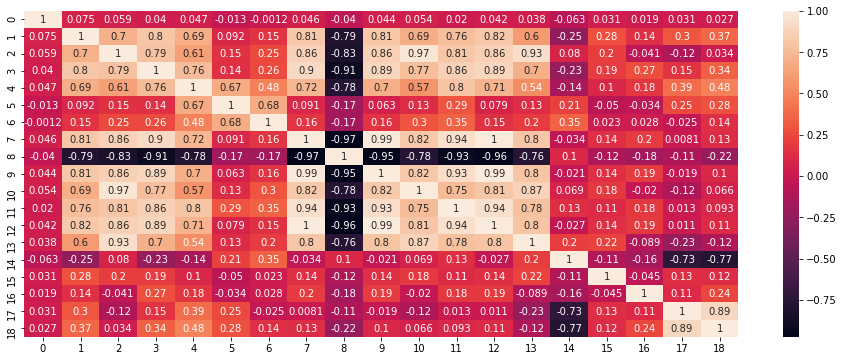

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))
sns.heatmap(X_train_pd.corr(), annot=True)

<AxesSubplot:>

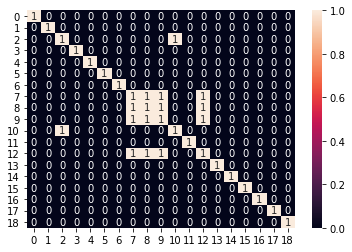

In [25]:
# выделим графически те признаки, которые имеют корреляцию выше 0.95
threshold = 0.95
sns.heatmap(abs(corr_matr) > threshold, annot=True)

Видим, что достаточно высокая корреляция у множества признаков. Обратившись к матрице корреляций (см. выше), можем увидеть, что коррелируют признаки

- 10 и 2 (оставим 2)
- 7, 8, 9, 12 (оставим 7)

Можем дропнуть все, кроме одного из каждой категории. 

In [26]:
X_test_pd = pd.DataFrame(X_test)

X_test_pd.drop(columns=[8, 9, 10, 12], inplace=True)
X_train_pd.drop(columns=[8, 9, 10, 12], inplace=True)

Также поглядим на балансировку:

In [27]:
uni, count = np.unique(y_train, return_counts=True)
dict(zip(uni, count))

{'bus': 144, 'opel': 147, 'saab': 136, 'van': 122}

Видим, что метки сбалансированы, однако они имеют тип объекта:

In [28]:
y_train.dtype

dtype('O')

Заменим метки со стрингов на числовые:

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
new_labels = le.fit_transform(y_train)

y_train = new_labels
y_train

array([0, 2, 0, 1, 3, 2, 0, 2, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 3, 0,
       0, 2, 3, 1, 1, 2, 0, 3, 2, 3, 3, 1, 1, 2, 2, 3, 2, 2, 0, 2, 1, 2,
       3, 1, 1, 3, 3, 1, 0, 0, 0, 0, 0, 0, 2, 1, 3, 3, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 2, 3, 2, 3, 3, 2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 2, 1, 3, 0,
       3, 1, 1, 3, 0, 3, 3, 3, 0, 2, 0, 3, 2, 2, 2, 0, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 0, 2, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 2, 2, 1, 2, 0, 0,
       0, 3, 1, 2, 1, 1, 3, 0, 3, 1, 1, 2, 0, 0, 3, 2, 1, 1, 0, 0, 1, 1,
       1, 0, 2, 2, 1, 1, 3, 1, 2, 3, 0, 0, 1, 2, 3, 1, 2, 0, 1, 2, 2, 0,
       0, 3, 3, 2, 1, 3, 2, 0, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 0, 1, 1, 3,
       3, 1, 2, 3, 3, 2, 3, 3, 2, 0, 3, 3, 1, 2, 0, 1, 2, 1, 0, 1, 2, 2,
       2, 0, 3, 2, 2, 1, 0, 2, 0, 1, 0, 3, 3, 1, 1, 0, 1, 1, 3, 0, 1, 0,
       1, 0, 0, 1, 3, 2, 1, 0, 3, 0, 0, 0, 1, 3, 0, 0, 2, 0, 2, 0, 3, 2,
       1, 1, 2, 2, 3, 1, 0, 3, 0, 2, 3, 1, 3, 2, 0, 1, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 1, 0, 0, 2, 2, 3, 1, 0, 2, 3, 0,

In [30]:
test_labels = le.fit_transform(y_test)

y_test = test_labels
y_test

array([3, 1, 1, 0, 0, 2, 3, 2, 2, 2, 1, 1, 0, 2, 3, 1, 0, 3, 3, 1, 2, 1,
       3, 0, 0, 3, 3, 1, 0, 2, 1, 0, 2, 3, 1, 2, 2, 3, 2, 3, 2, 1, 3, 3,
       0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2, 2, 2, 1, 0, 2, 3, 1, 2, 3, 3, 3,
       2, 3, 0, 2, 3, 2, 1, 0, 3, 0, 0, 3, 0, 1, 1, 0, 2, 2, 3, 3, 2, 2,
       2, 3, 1, 2, 3, 1, 1, 0, 3, 0, 0, 1, 2, 3, 0, 2, 2, 2, 3, 3, 2, 0,
       3, 1, 1, 2, 2, 3, 2, 0, 1, 0, 1, 0, 1, 1, 0, 2, 2, 3, 0, 0, 2, 0,
       0, 0, 1, 0, 2, 1, 1, 3, 0, 3, 0, 2, 0, 0, 3, 1, 2, 0, 3, 1, 0, 3,
       3, 1, 3, 3, 1, 1, 0, 2, 3, 2, 2, 2, 3, 3, 2, 1, 2, 3, 3, 0, 2, 1,
       2, 0, 0, 0, 3, 2, 3, 2, 0, 0, 3, 0, 1, 1, 1, 2, 1, 2, 3, 3, 1, 0,
       1, 3, 0, 2, 3, 0, 2, 1, 2, 1, 2, 3, 1, 3, 0, 0, 3, 2, 1, 3, 1, 2,
       1, 3, 3, 3, 3, 3, 2, 1, 0, 1, 1, 1, 3, 2, 0, 2, 3, 1, 0, 1, 0, 3,
       2, 3, 2, 3, 2, 2, 1, 1, 0, 2, 2, 2, 0, 3, 0, 2, 0, 1, 3, 0, 3, 0,
       3, 3, 2, 1, 3, 2, 2, 1, 3, 2, 3, 3, 2, 0, 1, 3, 2, 0, 3, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 2, 0, 1, 1, 2])

Мы видели характеристики каждой фичи выше в `describe()`. Посмотрим на их распределение визуально:

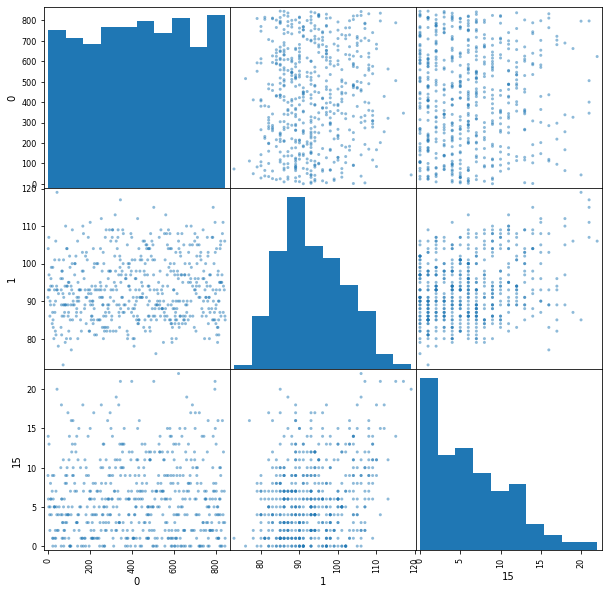

In [31]:
from pandas.plotting import scatter_matrix

scatter_matrix(X_train_pd[[0, 1, 15]], figsize=(10, 10))
plt.show()

Видим большую разницу в порядках значений. Поэтому заскейлим данные:

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train_pd)
X_test_scaled = ss.fit_transform(X_test_pd)

In [33]:
train_columns = X_train_pd.columns
test_columns = X_test_pd.columns

X_train_pd = pd.DataFrame(X_train_scaled)
X_test_pd = pd.DataFrame(X_test_scaled)

X_train_pd.columns = train_columns
X_test_pd.columns = test_columns

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [35]:
lr = LogisticRegression(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500)
grid_para = {'penalty': ['l1', 'l2'],
    'C': np.linspace(1, 1, 1000)}

logreg = GridSearchCV(lr, grid_para, cv=3)
logreg = logreg.fit(X_train_pd, y_train).best_estimator_

In [36]:
from sklearn.metrics import f1_score, accuracy_score, classification_report

y_pred = logreg.predict(X_test_pd)
print('f1 score: ', f1_score(y_test, y_pred, average='macro'))
print('accuracy: ', accuracy_score(y_test, logreg.predict(X_test_pd)))

f1 score:  0.7976085965443549
accuracy:  0.8047138047138047


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        74
           1       0.65      0.68      0.66        65
           2       0.75      0.62      0.68        81
           3       0.89      0.96      0.92        77

    accuracy                           0.80       297
   macro avg       0.80      0.80      0.80       297
weighted avg       0.80      0.80      0.80       297



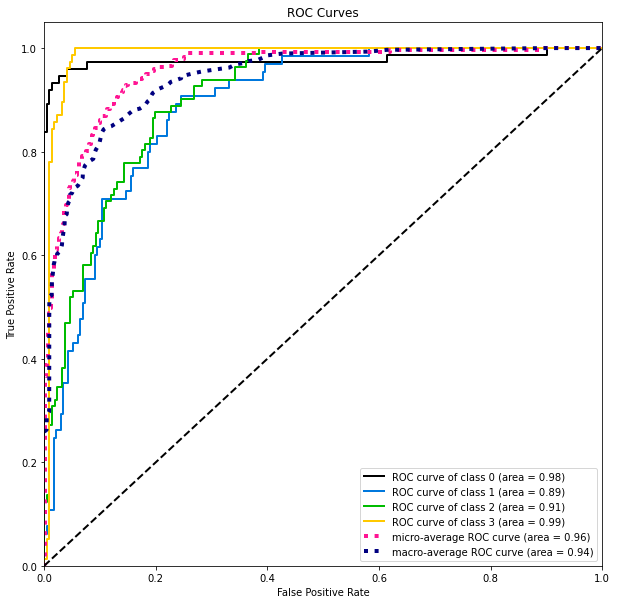

In [38]:
from scikitplot.metrics import plot_roc

plot_roc(y_test, logreg.predict_proba(X_test_pd), figsize=(10, 10))
plt.show()

AUC >= 0.89, выглядит хорошо!!!

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [39]:
from sklearn.decomposition import PCA

pca = PCA()
pca_results = pca.fit(X_train_pd)

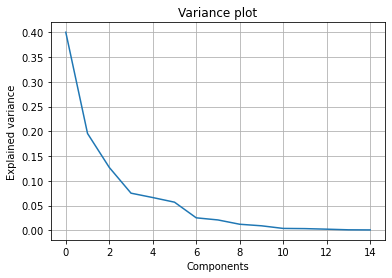

In [40]:
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Components')
plt.ylabel('Explained variance')
plt.title('Variance plot')
plt.grid(':')
plt.show()

Видно, что достаточно 10 компонент, чтобы охрактеризовать выборку.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

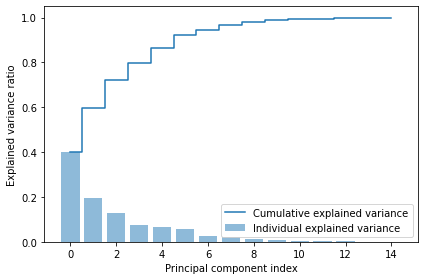

In [41]:
exp_var_pca = pca.explained_variance_ratio_

cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [42]:
cumsum_understanding = pd.DataFrame(cum_sum_eigenvalues, index=range(1, len(cum_sum_eigenvalues) + 1))
cumsum_understanding

,0
1,0.399991
2,0.595564
3,0.722580
4,0.797617
5,0.863831
6,0.920693
7,0.945958
8,0.966944
9,0.979238
10,0.988400


0.99% данных описывают 11 компонент. Оставим 11 штук.

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [43]:
pca = PCA(n_components=11, random_state=42)
X_train_pca = pca.fit_transform(X_train_pd)
X_test_pca = pca.transform(X_test_pd)

In [44]:
lr1 = LogisticRegression(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500)

grid_parameters = {'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 2, 5, 10, 15, 20, 50]}

logreg2 = GridSearchCV(lr1, grid_parameters, scoring="f1_weighted", n_jobs=-1, verbose=10)
logreg3 = GridSearchCV(lr1, grid_parameters, scoring="accuracy", n_jobs=-1, verbose=10)

In [45]:
logreg2.fit(X_train_pca, y_train)
logreg3.fit(X_train_pca, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=LogisticRegression(max_iter=500,
                                          multi_class='multinomial',
                                          solver='saga', tol=0.001),
             n_jobs=-1,
             param_grid={'C': [0.1, 1, 2, 5, 10, 15, 20, 50],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=10)

Посмотрим, какие параметры получились при подборе по `f1_weighted`:

In [46]:
logreg2.best_params_['penalty']

'l2'

In [47]:
logreg2.best_params_['C']

2

По `accuracy` получились другие параметры:

In [48]:
logreg3.best_params_['penalty']

'l2'

In [49]:
logreg3.best_params_['C']

1

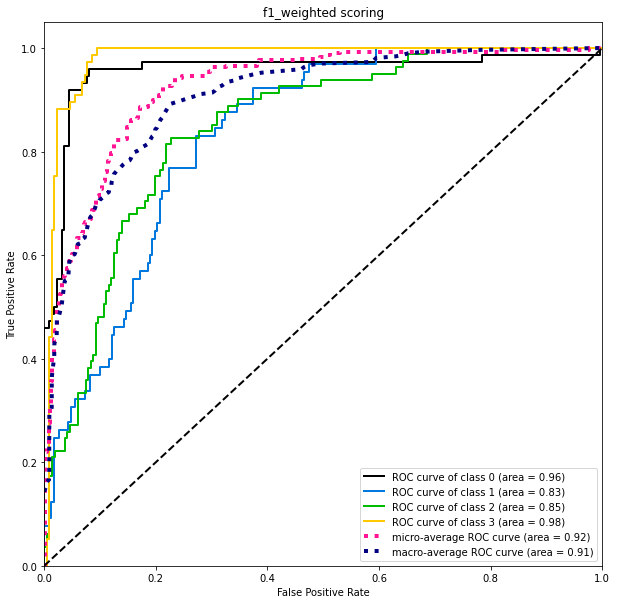

In [50]:
plot_roc(y_test, logreg2.predict_proba(X_test_pca), figsize=(10, 10))
plt.title("f1_weighted scoring")
plt.show()

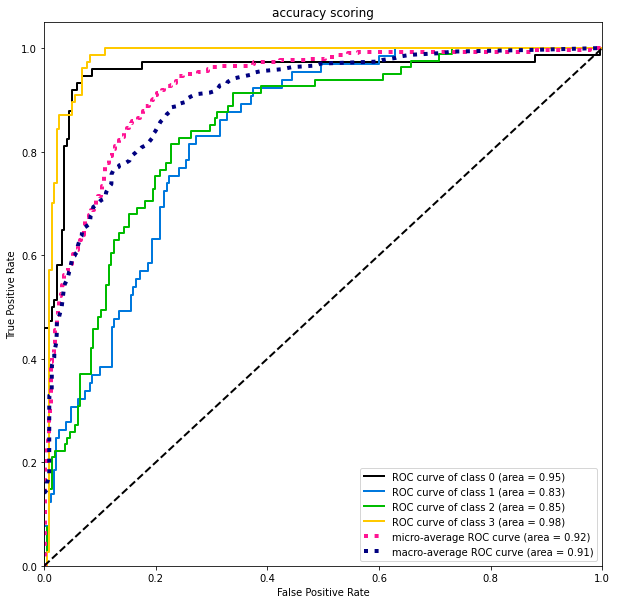

In [51]:
plot_roc(y_test, logreg3.predict_proba(X_test_pca), figsize=(10, 10))
plt.title("accuracy scoring")
plt.show()

Видим, что с PCA результаты становятся немного хуже, однако не критично.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [52]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc_params = {'max_depth': np.arange(1, 100)}

tree_acc = GridSearchCV(dtc, dtc_params, scoring = 'accuracy')
tree_acc.fit(X_train_pca, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='accuracy')

In [53]:
tree_f1 = GridSearchCV(dtc, dtc_params, scoring = 'f1_weighted')
tree_f1.fit(X_train_pca, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [54]:
accuracy_score(y_test, tree_acc.predict(X_test_pca))

0.632996632996633

In [55]:
tree_acc.best_params_['max_depth']

24

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

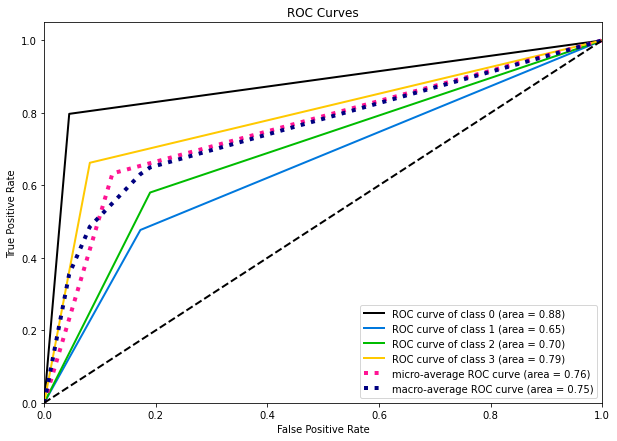

In [56]:
plot_roc(y_test, tree_acc.predict_proba(X_test_pca), figsize=(10, 7))

In [57]:
f1_score(y_test, tree_f1.predict(X_test_pca), average="weighted")

0.6464527305725127

In [58]:
tree_f1.best_params_['max_depth']

74

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

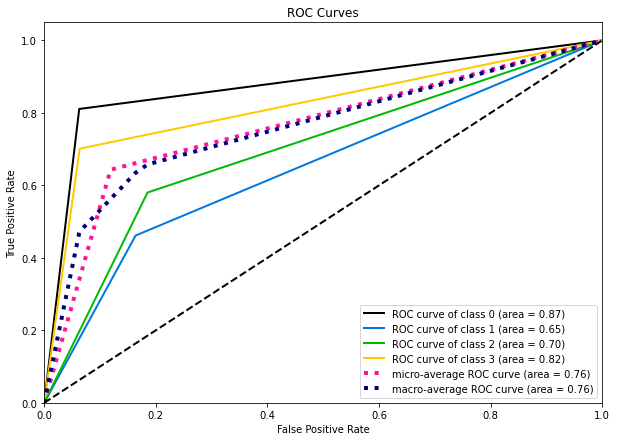

In [59]:
plot_roc(y_test, tree_f1.predict_proba(X_test_pca), figsize=(10, 7))

Видим, что качество у деревьев хуже, чем у логистической регрессии. То есть не обязательно всегда использовать более сложный метод, бывает, что простой работает хорошо.
Видим также, что по f1_score нашлись чуть более удачные параметры, которые показывают более хорошее качество.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

Возьмем лучшие параметры, которые мы посчитали выше, и пройдемся по количеству ансамблей.

In [60]:
best_logreg_f1 = LogisticRegression(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500, penalty='l2', C=2)

best_tree_f1 = DecisionTreeClassifier(max_depth=74)

best_logreg_acc = LogisticRegression(multi_class='multinomial',
                       solver='saga',
                       tol=1e-3,
                       max_iter=500, penalty='l2', C=1)

best_tree_acc = DecisionTreeClassifier(max_depth=24)

In [ ]:
from sklearn.ensemble import BaggingClassifier

tree_acc = []
tree_f1 = []

logreg_acc = []
logreg_f1 = []

for i in range(2, 100, 5):
    
    # сначала f1 часть
    
    clf1 = BaggingClassifier(base_estimator=best_logreg_f1, n_estimators=i)
    clf1.fit(X_train_pca, y_train)
    logreg_f1.append(f1_score(y_test, clf1.predict(X_test_pca), average="macro"))
    
    clf2 = BaggingClassifier(base_estimator=best_tree_f1, n_estimators=i)
    clf2.fit(X_train_pca, y_train)
    tree_f1.append(f1_score(y_test, clf2.predict(X_test_pca), average="macro"))
    
    # затем acc 
    
    clf3 = BaggingClassifier(base_estimator=best_logreg_acc, n_estimators=i)
    clf3.fit(X_train_pca, y_train)
    logreg_acc.append(accuracy_score(y_test, clf3.predict(X_test_pca)))
    
    clf4 = BaggingClassifier(base_estimator=best_tree_acc, n_estimators=i)
    clf4.fit(X_train_pca, y_train)
    tree_acc.append(accuracy_score(y_test, clf4.predict(X_test_pca)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

In [ ]:
print("Best tree_acc: " + str(np.arange(2, 100, 5)[np.argmax(tree_acc)]))
print("Best tree_f1: " + str(np.arange(2, 100, 5)[np.argmax(tree_f1)]))
print("Best logreg_acc: " + str(np.arange(2, 100, 5)[np.argmax(logreg_acc)]))
print("Best logreg_f1: " + str(np.arange(2, 100, 5)[np.argmax(logreg_f1)]))

Изобразим полученные результаты:

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(2, 100, 5), tree_acc, label="tree_acc")
plt.plot(np.arange(2, 100, 5), tree_f1, label="tree_f1")
plt.plot(np.arange(2, 100, 5), logreg_acc, label="logreg_acc")
plt.plot(np.arange(2, 100, 5), logreg_f1, label="logreg_f1")
plt.title("Accuracy of bagging with different bases")
plt.xlabel("N of trees")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

Непонятно, почему не сходится 😡😡😡😡😡

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE